In [1]:
from google.colab import files
uploaded = files.upload()


Saving bbc-text.csv to bbc-text.csv


In [2]:
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.3 MB/s eta 0:00:00


In [3]:
!pip install transformers accelerate torch scikit-learn pandas matplotlib seaborn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import replicate
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from transformers import AutoTokenizer, AutoModelForCausalLM


In [5]:
# Ganti path sesuai lokasi file di Colab
df = pd.read_csv("/content/bbc-text.csv")
df.head()


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


Jumlah data: 2225

Distribusi kategori:
 category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64


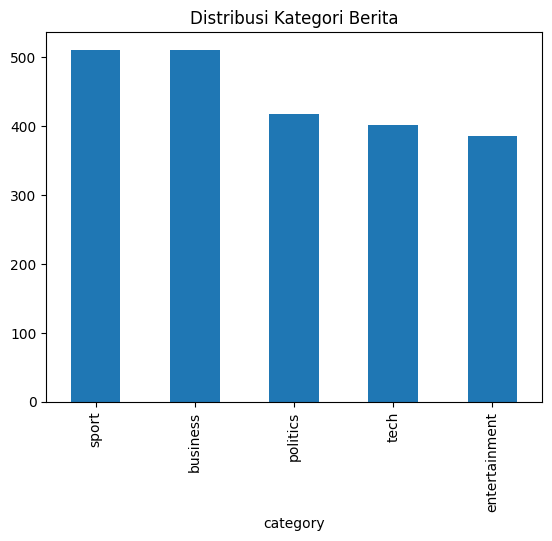

In [6]:
print("Jumlah data:", len(df))
print("\nDistribusi kategori:\n", df['category'].value_counts())

# Visualisasi distribusi kategori
df['category'].value_counts().plot(kind="bar", title="Distribusi Kategori Berita")
plt.show()


In [7]:
X = df['text']
y = df['category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [9]:
clf = LogisticRegression(max_iter=200)
clf.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=200)


Classification Report:
                precision    recall  f1-score   support

     business       0.97      0.98      0.98       102
entertainment       0.97      1.00      0.99        77
     politics       0.98      0.99      0.98        84
        sport       1.00      1.00      1.00       102
         tech       1.00      0.95      0.97        80

     accuracy                           0.98       445
    macro avg       0.98      0.98      0.98       445
 weighted avg       0.98      0.98      0.98       445



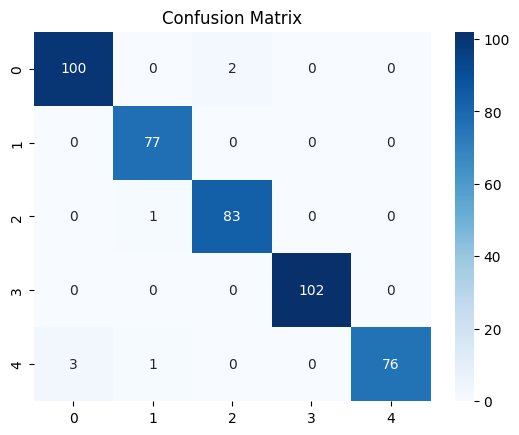

In [10]:
y_pred = clf.predict(X_test_tfidf)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [11]:
# Set API token (dari akun Replicate kamu)
os.environ["REPLICATE_API_TOKEN"] = "r8_VThQMBLOZCFmeg9S0v7LflCPgtQ31Ld4b6VI5"

# Pilih model IBM Granite
model = "ibm-granite/granite-3.3-8b-instruct"

# Contoh summarization
article = "tigers wary of farrell gamble leicester say ..."
output = replicate.run(
    f"{model}",
    input={"prompt": f"Summarize this news:\n\n{article}"}
)

print("Generated Summary:\n", "".join(output))

Generated Summary:
 The article discusses Leicester City's manager Brendan Rodgers expressing caution about Chelsea's new signing, Armando Broja. Despite Broja's impressive performance, Rodgers, drawing parallels to his past experience with Romelu Lukaku, suggests Broja might face a similar transition period. Rodgers, comparing it to a "gamble" taken by former Chelsea manager Jose Mourinho, warns Leicester City not to underestimate Broja's potential growth. Meanwhile, Leicester City prepares to face Chelsea, with Rodgers acknowledging the challenge posed by Broja and other Chelsea players. The Tigers (Leicester City) are wary of Broja's impact, reflecting on past experiences with promising strikers.
